In [1]:
import librosa
import numpy as np
import os
import pandas as pd
from sklearn.metrics import accuracy_score

/tmp/ipykernel_3722/1929855782.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data = pd.read_csv("dataset-nosource20.csv")
data.shape

(4460, 29)

In [3]:
data = data.drop(columns=['Unnamed: 0','filename'])
data.head()

,rmse,chroma_stft,spec_cent,spec_bw,rolloff,zcr,mfcc0,mfcc1,mfcc2,mfcc3,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,raga
0,0.247675,0.305712,1228.491018,929.363050,2017.287802,0.085456,-129.488627,191.339164,-100.677093,6.417244,...,-15.933134,-9.698000,-9.301477,-15.368613,-10.326237,-9.188417,-6.751254,-6.369478,-4.280662,yadukula kambhoji
1,0.246920,0.335608,1180.489157,890.218830,1949.396546,0.083432,-115.945872,202.310302,-98.086572,-2.765332,...,-15.266380,-9.678438,-11.228719,-16.116200,-9.437622,-10.340269,-9.282719,-8.650356,-6.603390,yadukula kambhoji
2,0.247732,0.332265,1210.866427,914.699175,2026.596079,0.085487,-115.878782,202.733071,-103.603642,4.334688,...,-15.581659,-7.640255,-10.112380,-15.655597,-10.358031,-11.439684,-8.517647,-8.332882,-6.084700,yadukula kambhoji
3,0.256049,0.328096,1245.976622,937.479674,2030.512722,0.088048,-108.181656,198.336490,-106.341385,5.316063,...,-17.258873,-11.478062,-11.327808,-15.416572,-11.287637,-11.255905,-6.457401,-5.643155,-5.464182,yadukula kambhoji
4,0.256627,0.327823,1222.358511,922.019811,1995.246268,0.087044,-111.168586,201.541160,-105.129272,4.218770,...,-15.598288,-10.710727,-10.313726,-13.938992,-10.106715,-10.499928,-7.636045,-7.792032,-6.366081,yadukula kambhoji


#Model Training

In [4]:
import os
import librosa
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import keras
from keras import layers
from keras import layers
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Flatten
from keras.optimizers import Adam
from keras.layers import Bidirectional
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

2024-04-21 14:53:55.481523: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-21 14:53:55.552588: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-21 14:53:56.040506: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-21 14:53:57.714926: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [5]:
#Encoding the Labels
raga_list = data.iloc[:, -1]
encoder = LabelEncoder()
Y = encoder.fit_transform(raga_list)
#Scaling the Feature columns
scaler = StandardScaler()
X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))
#Dividing data into training and Testing set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

#ANN Model

In [6]:
model = Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(20, activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

/home/sypher/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-04-21 14:54:00.168735: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-21 14:54:00.169045: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         6,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 20)             │         1,300 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49,364 (192.83 KB)

 Trainable params: 49,364 (192.83 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
classifier = model.fit(X_train, y_train,batch_size=128, epochs=250, validation_data=(X_test,y_test))

Epoch 1/250
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1222 - loss: 2.9101 - val_accuracy: 0.1471 - val_loss: 2.7823
Epoch 2/250
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1995 - loss: 2.6661 - val_accuracy: 0.2036 - val_loss: 2.6348
Epoch 3/250
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2495 - loss: 2.4649 - val_accuracy: 0.2395 - val_loss: 2.4921
Epoch 4/250
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3027 - loss: 2.2779 - val_accuracy: 0.2726 - val_loss: 2.3409
Epoch 5/250
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3650 - loss: 2.1094 - val_accuracy: 0.3354 - val_loss: 2.2159
Epoch 6/250
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4159 - loss: 1.9376 - val_accuracy: 0.3641 - val_loss: 2.0654
Epoch 7/250
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4751 - loss: 1.7671 - val_accuracy: 0.4099 - val_loss: 1.9559
Epoch 8/250
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5121 - loss: 1.6372 - val_accuracy: 0.4117 - v

In [8]:
y_pred = model.predict(X)
y_pred_classes = np.argmax(y_pred, axis=1)
total_accuracy = accuracy_score(Y, y_pred_classes)
print(f"accuracy: {total_accuracy:.4f}")

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 915us/step
accuracy: 0.9341


LSTM Model

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
input_shape = (X_train.shape[1], X_train.shape[2])
model = Sequential()
adam1 = Adam(learning_rate=0.01)
model.add(LSTM(units=128, dropout=0.05, recurrent_dropout=0.25, return_sequences=True,input_shape=input_shape))
model.add(LSTM(units=64,  dropout=0.05, recurrent_dropout=0.25, return_sequences=True))
model.add(Flatten())
model.add(Dense(units=20, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy", optimizer=adam1, metrics=["accuracy"],)
model.summary()

/home/sypher/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 1, 128)         │        79,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 1, 64)          │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 20)             │         1,300 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 130,068 (508.08 KB)

 Trainable params: 130,068 (508.08 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
batch_size = 35 # num of training examples per minibatch
num_epochs =200
classify2 = model.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=num_epochs,
    validation_data=(X_test,y_test),
)

Epoch 1/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.1363 - loss: 2.8398 - val_accuracy: 0.2305 - val_loss: 2.4749
Epoch 2/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2890 - loss: 2.2710 - val_accuracy: 0.4009 - val_loss: 1.9238
Epoch 3/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4533 - loss: 1.7160 - val_accuracy: 0.4789 - val_loss: 1.6475
Epoch 4/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5818 - loss: 1.3218 - val_accuracy: 0.5453 - val_loss: 1.4199
Epoch 5/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6624 - loss: 1.0515 - val_accuracy: 0.6027 - val_loss: 1.2571
Epoch 6/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7271 - loss: 0.8632 - val_accuracy: 0.6395 - val_loss: 1.2023
Epoch 7/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7847 - loss: 0.7209 - val_accuracy: 0.6682 - val_loss: 1.1065
Epoch 8/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7791 - loss: 0.6894 - val_accuracy: 0.6547 - v

In [11]:
X_reshaped = np.reshape(X, (X.shape[0], 1, X.shape[1]))
y_pred = model.predict(X_reshaped)
y_pred_classes = np.argmax(y_pred, axis=1)
total_accuracy = accuracy_score(Y, y_pred_classes)
print(f"Total accuracy on the entire dataset (X and Y): {total_accuracy:.4f}")

140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Total accuracy on the entire dataset (X and Y): 0.9244


#BiLSTM Model

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
input_shape = (X_train.shape[1], X_train.shape[2])
model = Sequential()
adam1 = Adam(learning_rate=0.001)
model.add(Bidirectional(LSTM(units=128, dropout=0.05, recurrent_dropout=0.25, return_sequences=True),input_shape=input_shape))
model.add(Bidirectional(LSTM(units=64,  dropout=0.05, recurrent_dropout=0.25, return_sequences=True)))
model.add(Flatten())
model.add(Dense(units=20, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy", optimizer=adam1, metrics=["accuracy"],)
model.summary()

/home/sypher/.local/lib/python3.10/site-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 1, 256)         │       158,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 1, 128)         │       164,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 20)             │         2,580 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 325,652 (1.24 MB)

 Trainable params: 325,652 (1.24 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
batch_size = 35 # num of training examples per minibatch
num_epochs = 500
classify = model.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=num_epochs,
    validation_data=(X_test,y_test),
)

Epoch 1/500
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.1125 - loss: 2.9554 - val_accuracy: 0.1641 - val_loss: 2.7877
Epoch 2/500
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1741 - loss: 2.7183 - val_accuracy: 0.1937 - val_loss: 2.6087
Epoch 3/500
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2275 - loss: 2.4950 - val_accuracy: 0.2413 - val_loss: 2.4390
Epoch 4/500
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2824 - loss: 2.3036 - val_accuracy: 0.2888 - val_loss: 2.2947
Epoch 5/500
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3587 - loss: 2.0798 - val_accuracy: 0.3247 - val_loss: 2.1385
Epoch 6/500
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4114 - loss: 1.9085 - val_accuracy: 0.3704 - val_loss: 2.0057
Epoch 7/500
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4667 - loss: 1.7512 - val_accuracy: 0.4188 - val_loss: 1.8693
Epoch 8/500
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5218 - loss: 1.5928 - val_accuracy: 0.4511 - 

In [14]:
X_reshaped = np.reshape(X, (X.shape[0], 1, X.shape[1]))
y_pred = model.predict(X_reshaped)
y_pred_classes = np.argmax(y_pred, axis=1)
total_accuracy = accuracy_score(Y, y_pred_classes)
print(f"Total accuracy on the entire dataset (X and Y): {total_accuracy:.4f}")

140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Total accuracy on the entire dataset (X and Y): 0.9451


# 1D Convolution Network

In [15]:
import os
import librosa
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import keras
import tensorflow.keras.layers as layers
import keras
import tensorflow as tf
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Flatten
from keras.optimizers import Adam
from keras.layers import Bidirectional
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [16]:
data = pd.read_csv('raga-dataset-new.csv')
# Dropping unneccesary columns
#Encoding the Labels
raga_list = data.iloc[:, -1]
encoder = LabelEncoder()
Y = encoder.fit_transform(raga_list)
#Scaling the Feature columns
scaler = StandardScaler()
X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))
#Dividing data into training and Testing set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
input_shape = (X_train.shape[1], X_train.shape[2])
X_train.shape[1], X_train.shape[2]

(1, 20)

In [17]:
model = tf.keras.Sequential()
model.add(layers.Conv1D(64, 3, activation='relu', padding='same', input_shape=input_shape))
model.add(layers.Conv1D(128, 3, activation='relu', padding='same'))
model.add(layers.Conv1D(256, 3, activation='sigmoid', padding='same'))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(96, activation='softmax'))
model.summary()

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

/home/sypher/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 1, 64)          │         3,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 1, 128)         │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 1, 256)         │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 96)             │        12,384 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 172,448 (673.62 KB)

 Trainable params: 172,448 (673.62 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
classifier = model.fit(
    X_train, y_train,
    batch_size=128,
    epochs=750,
    validation_data=(X_test, y_test),
)

Epoch 1/750
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.0176 - loss: 4.6384 - val_accuracy: 0.0507 - val_loss: 4.4361
Epoch 2/750
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0310 - loss: 4.4765 - val_accuracy: 0.0507 - val_loss: 4.3930
Epoch 3/750
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0358 - loss: 4.4104 - val_accuracy: 0.0507 - val_loss: 4.3509
Epoch 4/750
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0397 - loss: 4.3831 - val_accuracy: 0.0471 - val_loss: 4.3441
Epoch 5/750
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0379 - loss: 4.3319 - val_accuracy: 0.0743 - val_loss: 4.3017
Epoch 6/750
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0544 - loss: 4.3176 - val_accuracy: 0.0634 - val_loss: 4.2607
Epoch 7/750
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0693 - loss: 4.2772 - val_accuracy: 0.0779 - val_loss: 4.2033
Epoch 8/750
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0672 - loss: 4.1645 - val_accuracy: 0.0707 - 

In [19]:
X_reshaped = np.reshape(X, (X.shape[0], 1, X.shape[1]))
y_pred = model.predict(X_reshaped)
y_pred_classes = np.argmax(y_pred, axis=1)
accuracy = accuracy_score(Y, y_pred_classes)


print(f"accuracy: {accuracy:.4f}")

58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
accuracy: 0.9120


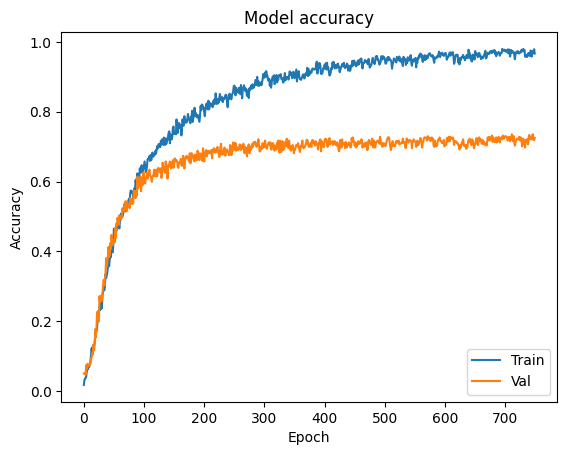

In [20]:
import matplotlib.pyplot as plt

plt.plot(classifier.history['accuracy'])
plt.plot(classifier.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

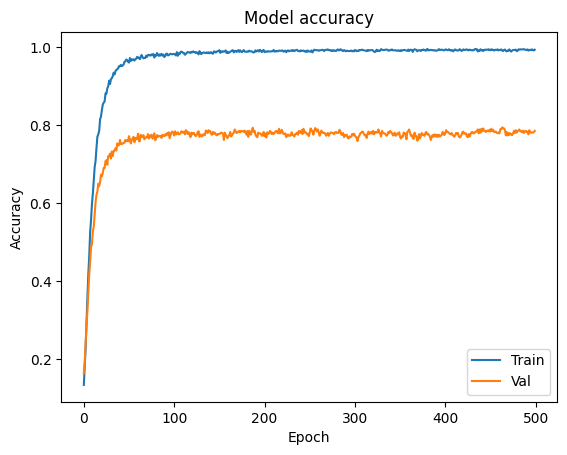

In [21]:
import matplotlib.pyplot as plt

plt.plot(classify.history['accuracy'])
plt.plot(classify.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

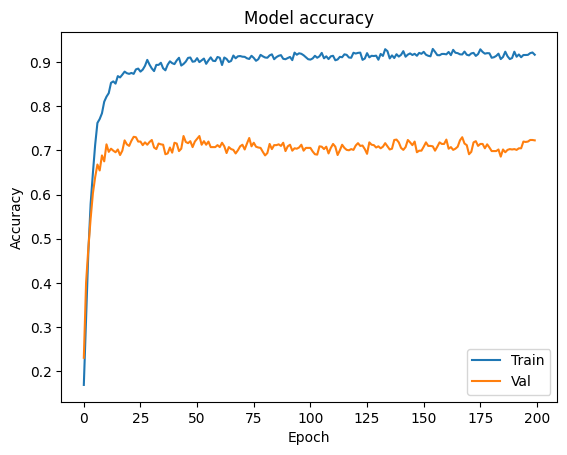

In [22]:
import matplotlib.pyplot as plt

plt.plot(classify2.history['accuracy'])
plt.plot(classify2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()